# Group Project - Machine Intelligence and Society 2023

### Important Notice

<!-- Markdown!!! -->
The project is about basic machine learning methods and fairness in machine learning associated with the Machine Intelligence and Society 2023 course. The members of this group is following:

<!-- Markdown!!! -->
<!-- 각자 파트/student ID/이름 스펠링 확인!! -->

| Matrikelnummer|  Name        | Responsibility    |    Program                                 |
|:-------------:|:------------:|:-----------------:|:------------------------------------------:|
|    03700000   |  Mingi Kang  |   report /        | Bachelor Elektro- und Informationstechnik  |
|    03722924   |  Semin Kim   | analysis / report | Bachelor Elektro- und Informationstechnik  |
|    03700000   |  Seyoung Kim | research / report | Bachelor Elektro- und Informationstechnik  |
|    03745303   | Taeyoung Kim |    programming    | Bachelor Elektro- und Informationstechnik  |


## INTRODUCTION OF THIS PROJECT

The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). 
This includes to identify and deal with any outliers, missing values etc. and to encode and scale features appropriately and the task is to classify if a person will be arrested or not. This project consists of a total of 4 modules: preprocessing, training, validation and testing.

# remove unnecessary code before submit!!!
# comment all code!!!
# all comment start with big alphabet

## PREPROCESSING 

In [1]:
# Remove unnecessary code before submit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read data
df = pd.read_csv("NC_policing.csv")

Check the component of dataset with method info/head/unique

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [4]:
# Show the number of unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

state: 1 unique values
stop_date: 5632 unique values
driver_gender: 2 unique values
driver_age: 83 unique values
driver_race_raw: 10 unique values
driver_race: 5 unique values
violation: 8 unique values
search_type: 6 unique values
contraband_found: 2 unique values
stop_outcome: 2 unique values
search_basis: 33 unique values
officer_id: 3018 unique values
drugs_related_stop: 1 unique values
district: 57 unique values


In [5]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

### Processing the missing values

In [6]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [7]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [8]:
# only 38 data missed, = keinen Einfluss auf dataset
df.dropna(subset=['district'], inplace=True)

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397670
district                   0
dtype: int64

## Drop unnecessary Data : 'drugs_related_stop', 'state'

In [9]:
df_encoded = df.copy()

# NaN 값이 너무 많은 컬럼 drugs_related_stop
# 모든 값이 동일한 컬럼 state
# 유사한 정보를 가지고 있는 컬럼 driver_race_raw (similar with driver_race)
df_encoded = df_encoded.drop(['drugs_related_stop','state'], axis=1)

## Converting 'stop_date' to datetime format

### 1. change format
### 2. inspect tendency & (necessary or not)
### 3. conclusion : drop year, month and day, but day of week can be used.

In [10]:
## Convert 'stop_date' to datetime format


df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
df_encoded['year'] = df_encoded['stop_date'].dt.year
df_encoded['month'] = df_encoded['stop_date'].dt.month
df_encoded['day'] = df_encoded['stop_date'].dt.day
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)



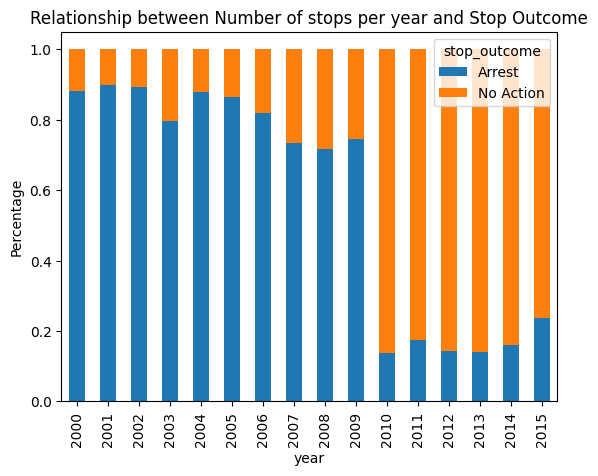

In [11]:
# Plot for Relationship between Number of stops per year and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['year'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per year and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

# Relationship btw year ~ stop_outcome

# 경향성 : 2010년대 이후로 No Action이 크게 증가 
# 해석 : 각 연도의 총 검문 횟수 데이터가 있나? 없으면 경향성 not logical

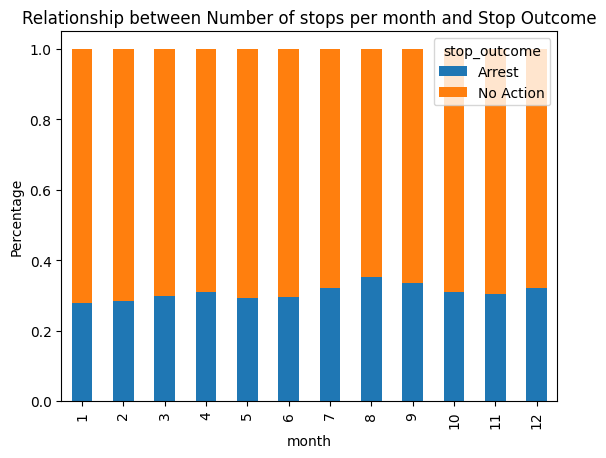

In [12]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per month and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['month'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per month and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

Month -> can be removed

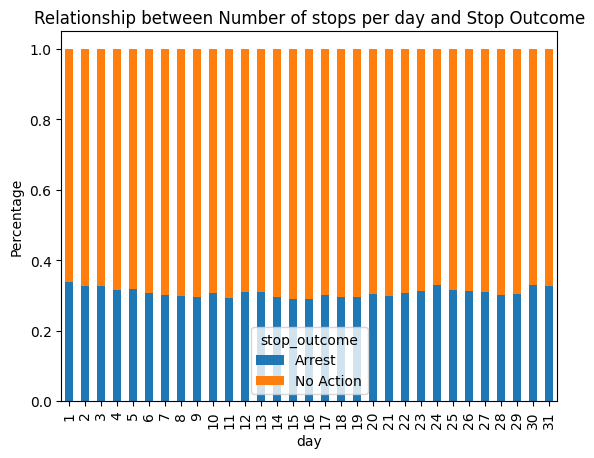

In [13]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per day and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per day and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

Day -> can be removed.

# 결론

In [14]:
# Drop  
df_encoded = df_encoded.drop(['year','month','day'], axis=1)

df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,False,False,False,False,False
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606


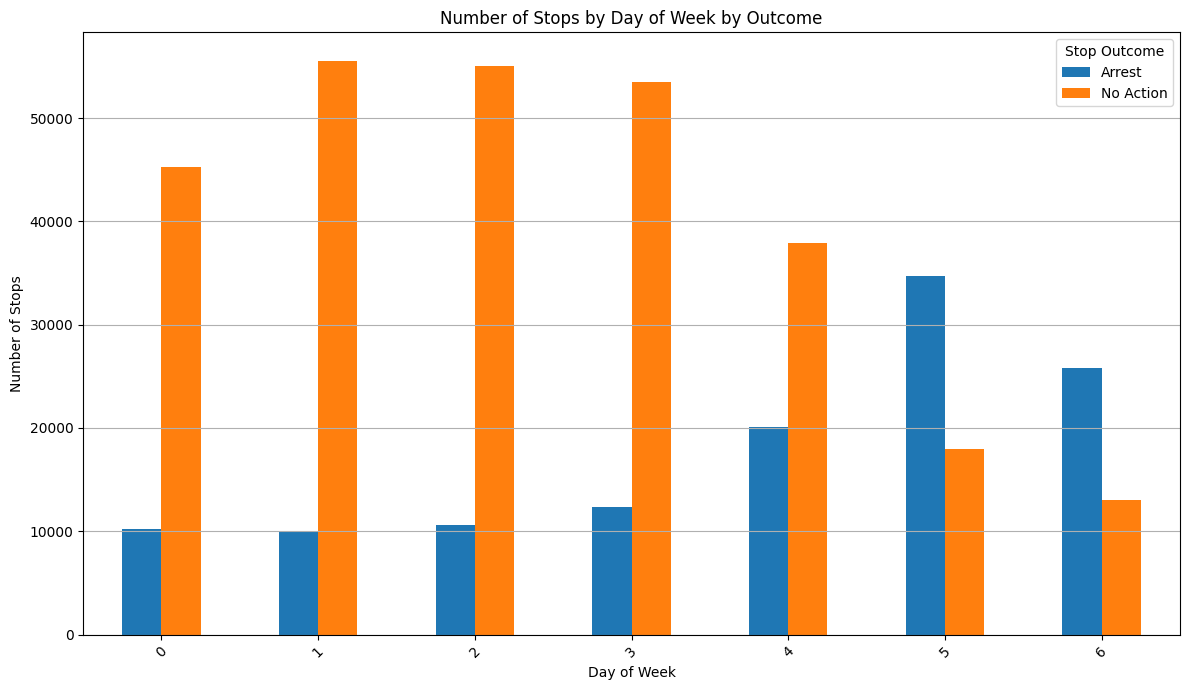

In [15]:
# day_of_week ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day_of_week', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops by Day of Week by Outcome')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

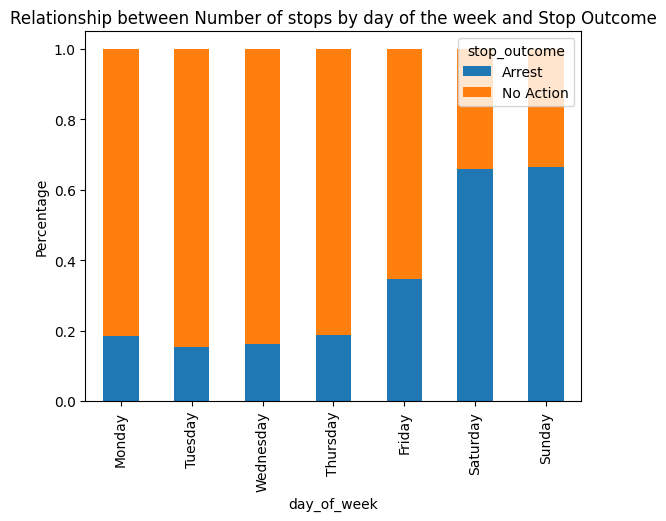

In [16]:
# Plot for Relationship between Number of stops by day of the week and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day_of_week'], df_encoded['stop_outcome'], normalize='index')

# Plot of day of week and stop outcome
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crosstab_normalized.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(7), labels=days)
plt.title('Relationship between Number of stops by day of the week and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

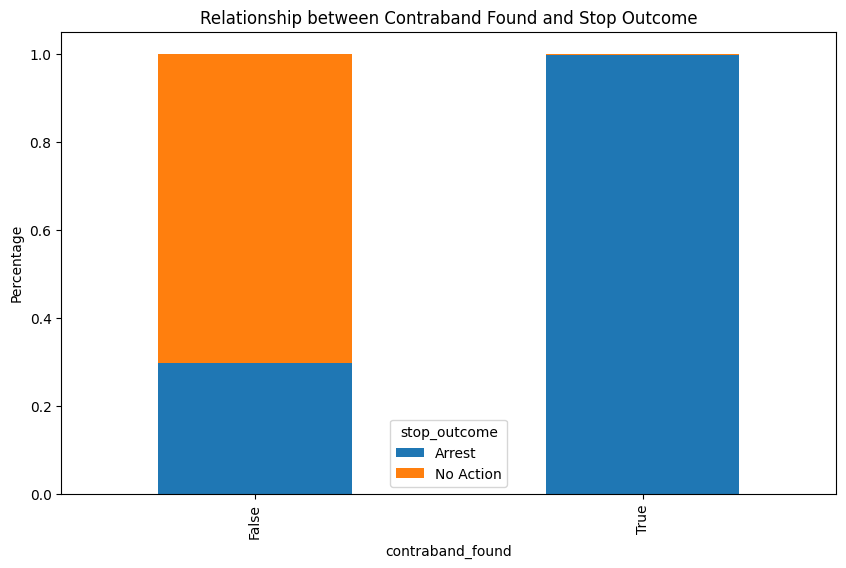

In [17]:
# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['contraband_found'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()


In [18]:
# Initialize label encoder
le = LabelEncoder()

# Encode 'contraband_found' column
df_encoded['contraband_found'] = le.fit_transform(df_encoded['contraband_found'])


df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606


#  Violation



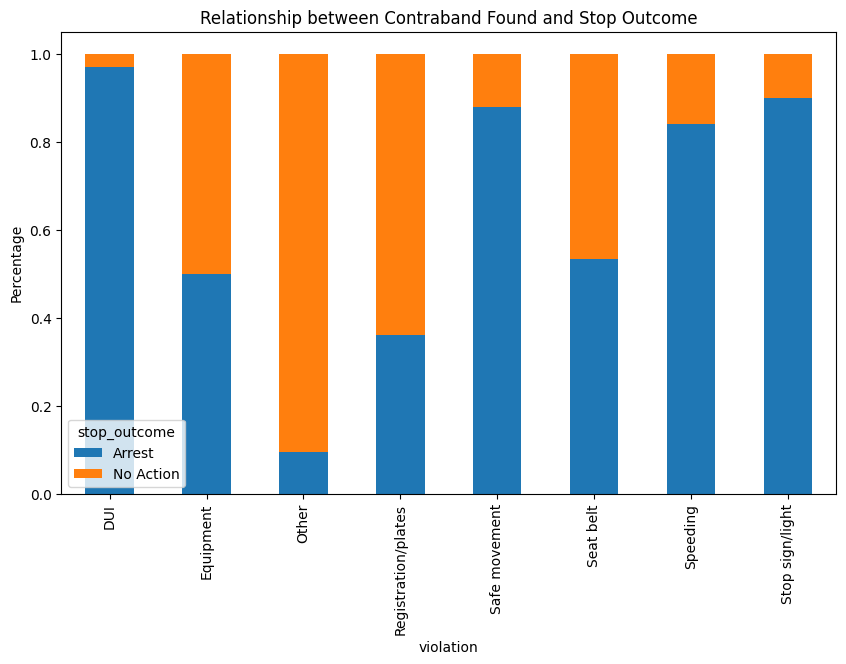

In [19]:
# Plot for Relationship between Violation and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['violation'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [20]:
# IF WE DECIDE TO USE ALL COLUMNS OF 'VIOLATION', DROP ONLY 'VIOLATION'
# REMOVE 'VIOLATION_DUI' IN THIS CODE

# One-hot encoding
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded['violation'], prefix='violation')], axis=1)

# Drop the original 'violation' column and the 'violation_DUI' column
df_encoded.drop(['violation'], axis=1, inplace=True)

df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606
district,E3,E3,E3,E3,E3


#  Race

In [21]:
#Check if driver_race_raw communicates anything specific about the sample
print("Relationship between 'driver_race' and 'driver_race_raw':\n",df.groupby(["driver_race", "driver_race_raw"]).size())

Relationship between 'driver_race' and 'driver_race_raw':
 driver_race  driver_race_raw
Asian        A N                  1774
Black        B N                102906
Hispanic     A H                    30
             B H                   422
             I H                    57
             U H                 26726
             W H                  3478
Other        I N                  3666
             U N                  4487
White        W N                258503
dtype: int64


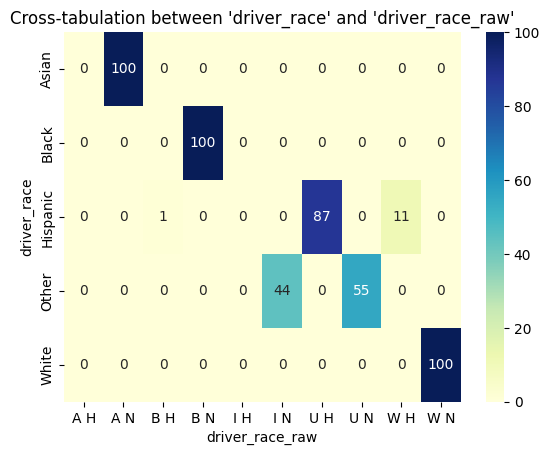

In [22]:
# Heatmap
ct = pd.crosstab(df['driver_race'], df['driver_race_raw'])
ct_percent = ct.div(ct.sum(axis=1), axis=0)
ct_percent_int = (ct_percent * 100).astype(int)
plt.figure()
sns.heatmap(ct_percent_int, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.title('Cross-tabulation between \'driver_race\' and \'driver_race_raw\'')
plt.show()

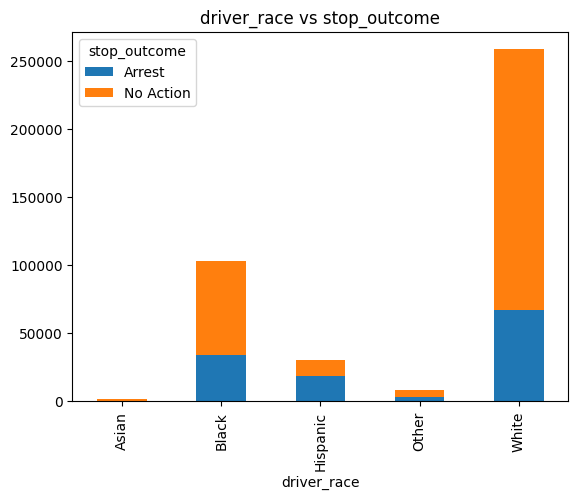

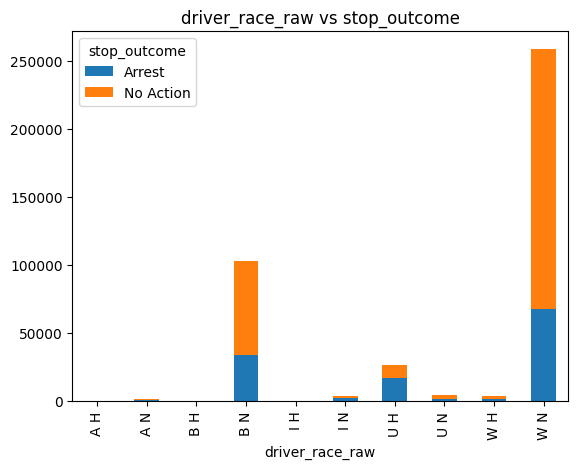

In [23]:
# Stacked Bar ~ stop_outcome
cross_tab_race = pd.crosstab(df['driver_race'], df['stop_outcome'])
cross_tab_race_raw = pd.crosstab(df['driver_race_raw'], df['stop_outcome'])

cross_tab_race.plot(kind='bar', stacked=True)
plt.title('driver_race vs stop_outcome')
plt.show()

cross_tab_race_raw.plot(kind='bar', stacked=True)
plt.title('driver_race_raw vs stop_outcome')
plt.show()

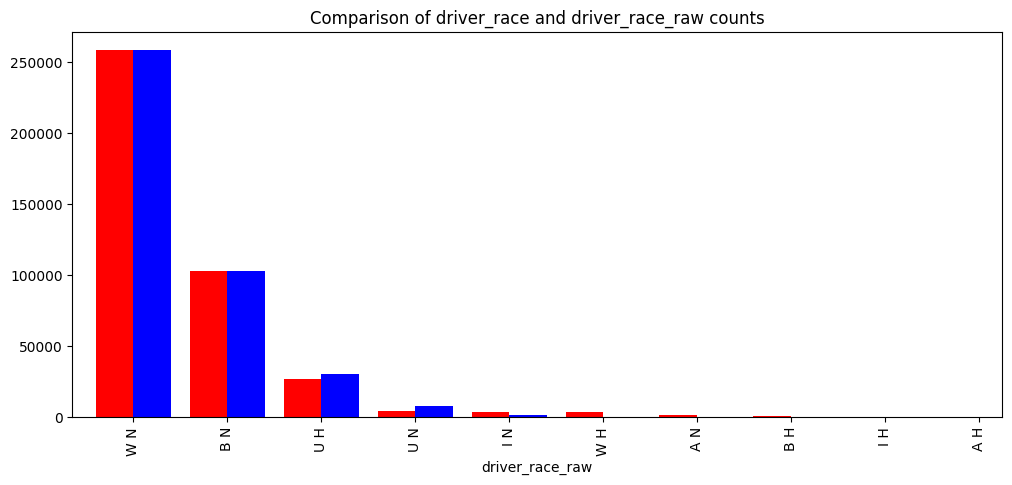

In [24]:
# Bar Plot (counting)
plt.figure(figsize=(12, 5))
df['driver_race'].value_counts().plot(kind='bar', position=0, color='blue', width=0.4)
df['driver_race_raw'].value_counts().plot(kind='bar', position=1, color='red', width=0.4)
plt.title('Comparison of driver_race and driver_race_raw counts')
plt.show()

In [25]:
# Drop 'driver_race_raw'
df_encoded = df_encoded.drop('driver_race_raw', axis=1)

# One-hot encode 'driver_race' 
driver_race_dummies = pd.get_dummies(df_encoded['driver_race'], prefix='driver_race')
df_encoded = pd.concat([df_encoded, driver_race_dummies], axis=1)

# Drop the original 'driver_race' column from df_encoded
df_encoded = df_encoded.drop('driver_race', axis=1)

# test REMOVE before submit
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606
district,E3,E3,E3,E3,E3
day_of_week,0,0,0,0,0
violation_DUI,False,False,False,False,False


In [26]:
# search_basis and search_type 부분집합/선후관계

# Drop the original 'search_basis' colum from df_encoded
df_encoded = df_encoded.drop('search_basis', axis=1)

In [27]:
# One-hot encoding for 'search_type'
dummies = pd.get_dummies(df_encoded['search_type'], prefix='search_type')

# Concatenate the one-hot encoded columns to df_encoded
df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Drop the original 'search_type' column
df_encoded = df_encoded.drop('search_type', axis=1)

In [28]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
officer_id,10606,10606,10606,10606,10606
district,E3,E3,E3,E3,E3
day_of_week,0,0,0,0,0
violation_DUI,False,False,False,False,False
violation_Equipment,False,False,False,False,False
violation_Other,False,False,False,False,False


In [29]:
# Not used Columns are removed
df_encoded.drop(['officer_id', 'district'], axis=1, inplace=True)

# Label encoding for binary columns 
encoder = LabelEncoder()
df_encoded.loc[:,'driver_gender'] = encoder.fit_transform(df_encoded.loc[:,'driver_gender'])

#for col in ['driver_gender','stop_outcome']:
#    df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])

In [30]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,1,0,0,1,1
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
day_of_week,0,0,0,0,0
violation_DUI,False,False,False,False,False
violation_Equipment,False,False,False,False,False
violation_Other,False,False,False,False,False
violation_Registration/plates,False,False,False,False,False
violation_Safe movement,False,False,False,False,False


In [31]:
#Check ob tere are antother missing values
df_encoded.isna().sum()

driver_gender                      0
driver_age                         0
contraband_found                   0
stop_outcome                       0
day_of_week                        0
violation_DUI                      0
violation_Equipment                0
violation_Other                    0
violation_Registration/plates      0
violation_Safe movement            0
violation_Seat belt                0
violation_Speeding                 0
violation_Stop sign/light          0
driver_race_Asian                  0
driver_race_Black                  0
driver_race_Hispanic               0
driver_race_Other                  0
driver_race_White                  0
search_type_Consent                0
search_type_Incident to Arrest     0
search_type_No Search Conducted    0
search_type_Probable Cause         0
search_type_Protective Frisk       0
search_type_Warrant                0
dtype: int64

## confirmed with 24 colums 

In [32]:
# Target y variables
y = df_encoded['stop_outcome']
y_enc = le.fit_transform(y)

# Print of output value
pd.DataFrame(data=le.transform(le.classes_),index=le.classes_,columns=['Output'])

,Output
Arrest,0
No Action,1


In [33]:
df_encoded = df_encoded.drop('stop_outcome',axis=1)

In [34]:
df_encoded.head()

,driver_gender,driver_age,contraband_found,day_of_week,violation_DUI,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,...,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,1,23.0,0,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0,29.0,0,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,49.0,0,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,29.0,0,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,1,24.0,0,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


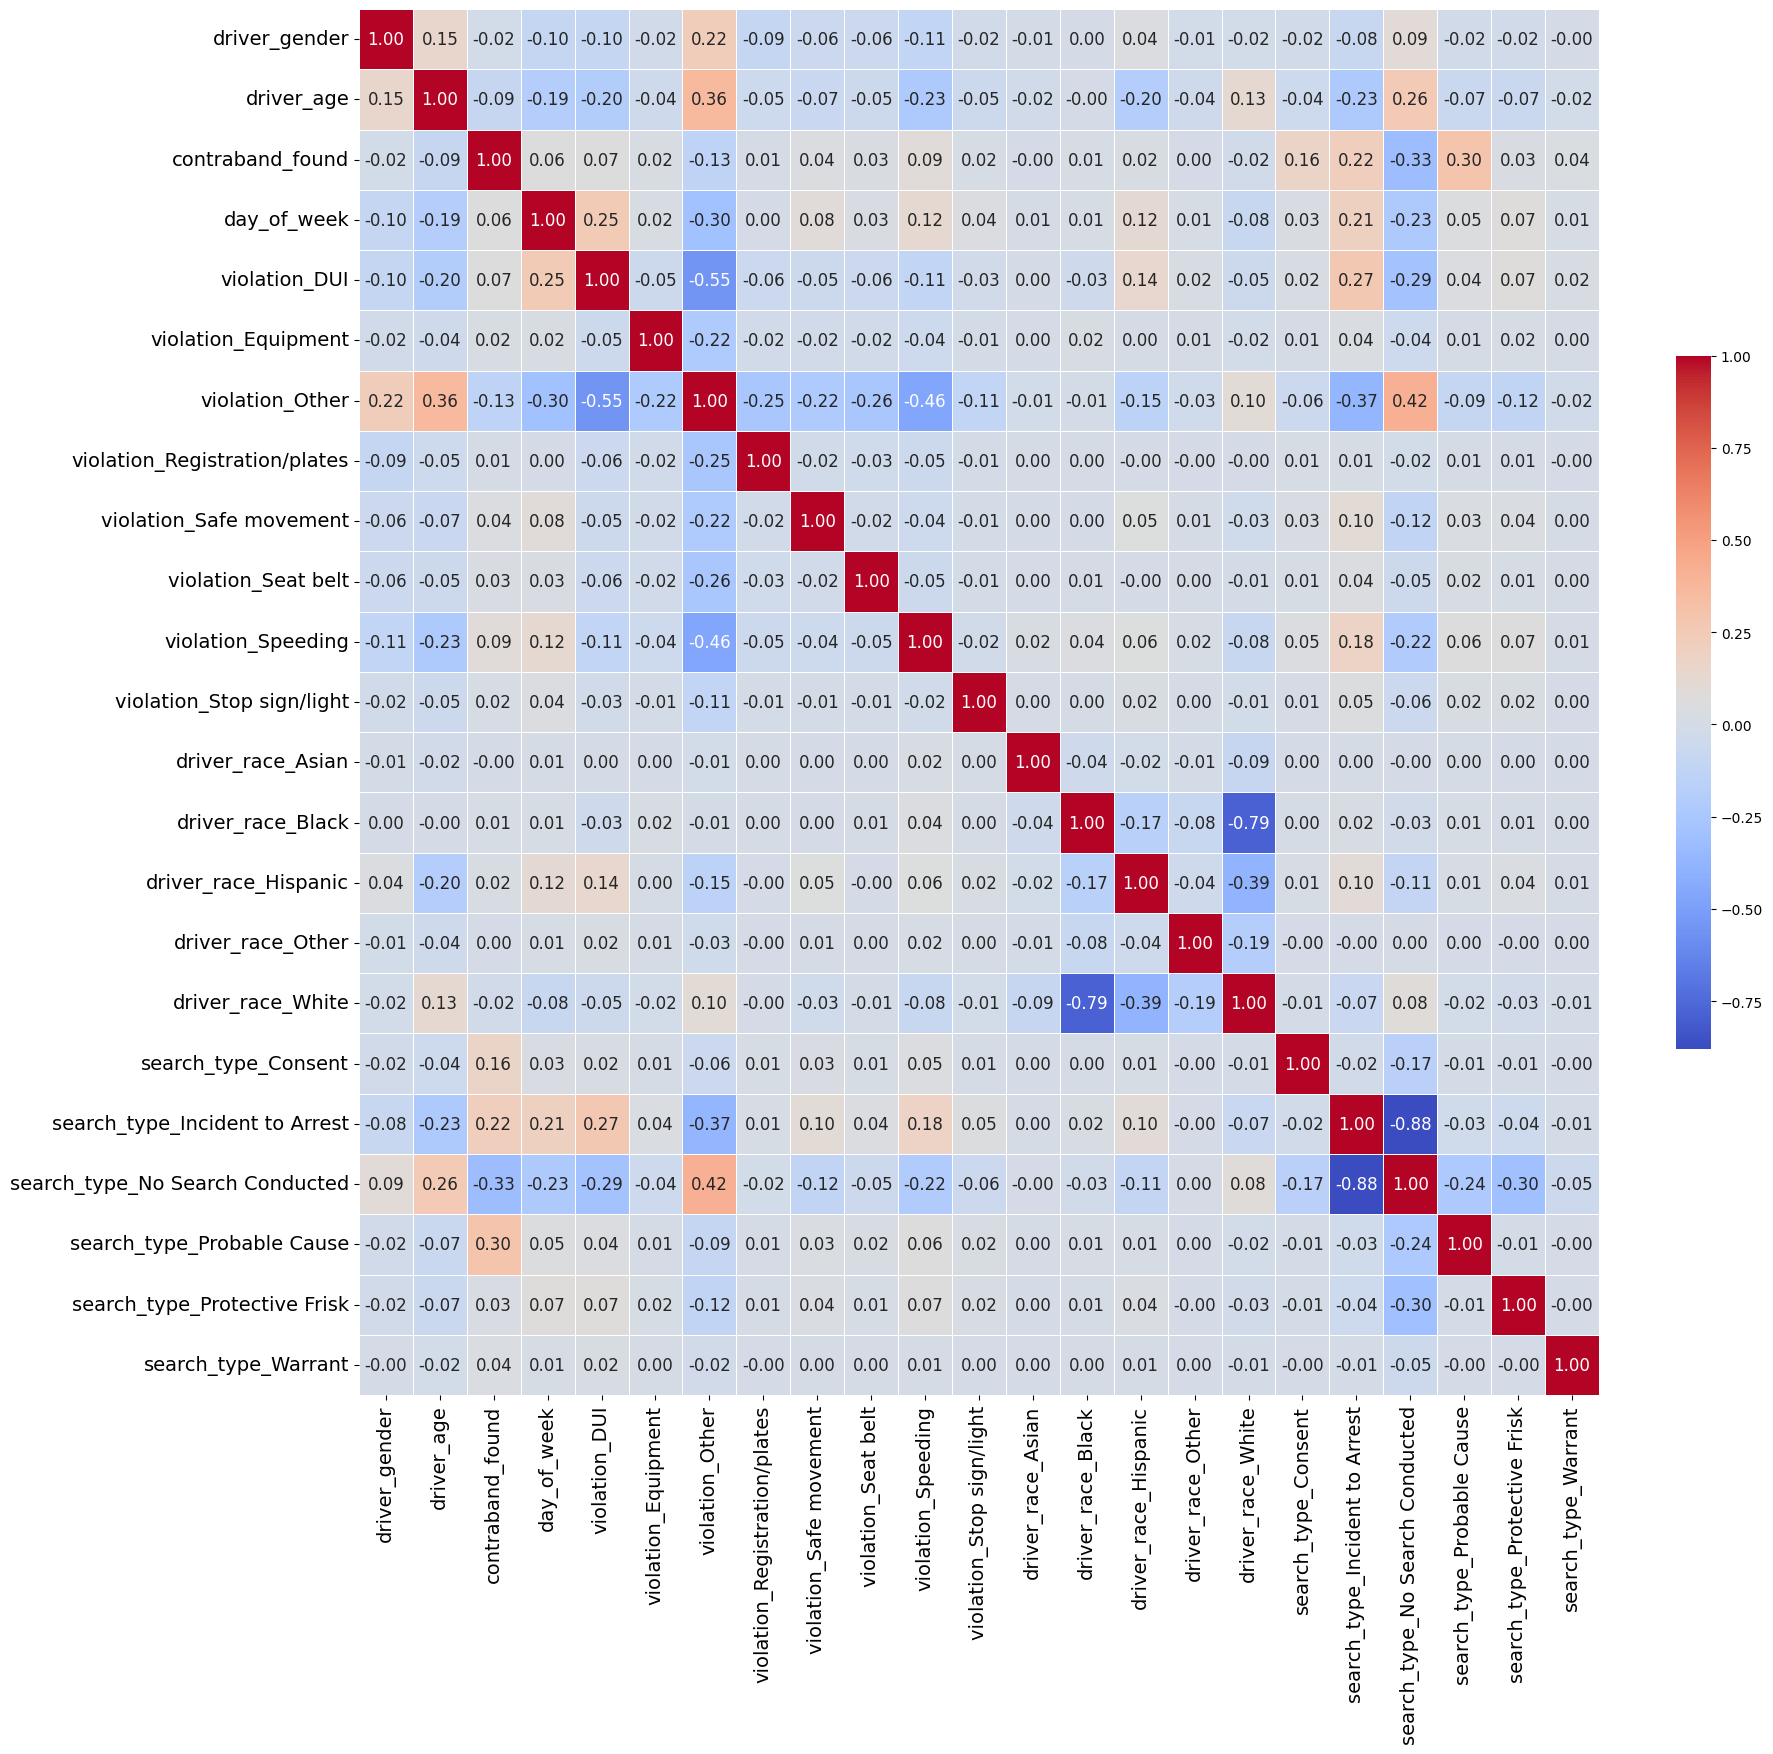

In [35]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df_encoded.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, 
            annot_kws={"size": 12})  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()


## After examining the correlation matrix, if we decide to drop features based on high correlations (multicollinearity), ensure that we arnt unintentionally removing important information. It's also good practice to re-evaluate our model's performance after removing correlated features to ensure that the model's performance hasn't degraded.

## this can be linked with task one of 7-9 to improve learning rate.

In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Split the data
X = df_encoded


X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y_cv, test_size=0.2, stratify=y_cv, random_state=42)

In [38]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,1,0,0,1,1
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0,0,0,0,0
day_of_week,0,0,0,0,0
violation_DUI,False,False,False,False,False
violation_Equipment,False,False,False,False,False
violation_Other,False,False,False,False,False
violation_Registration/plates,False,False,False,False,False
violation_Safe movement,False,False,False,False,False
violation_Seat belt,False,False,False,False,False


In [39]:
# ENCODING LABEL LIST
# For driver_gender
gender_enc = {0:'F', 1:'M'}

# For contraband_found
contraband_enc = {0:'False', 1:'True'}

# For day_of_week
days_enc = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# For violation
vio_DUI_enc = {0:'No', 1:'Yes'}
vio_Equipment_enc = {0:'No', 1:'Yes'}
vio_Other_enc = {0:'No', 1:'Yes'}
vio_Registration_enc  = {0:'No', 1:'Yes'}
vio_SafeMove_enc = {0:'No', 1:'Yes'}
vio_Seatbelt_enc = {0:'No', 1:'Yes'}
vio_Speeding_enc = {0:'No', 1:'Yes'}
vio_Stopsign_enc = {0:'No', 1:'Yes'}

# For driver_race
driver_race_Asian_enc = {0:'No', 1:'Yes'}
driver_race_Black_enc = {0:'No', 1:'Yes'}
driver_race_Hispanic_enc = {0:'No', 1:'Yes'}
driver_race_Other_enc = {0:'No', 1:'Yes'}
driver_race_White_enc = {0:'No', 1:'Yes'}

# For search_type
search_type_Consent_enc = {0:'No', 1:'Yes'}
search_type_Incident_to_Arrest_enc = {0:'No', 1:'Yes'}
search_type_NoSearchConducted_enc = {0:'No', 1:'Yes'}
search_type_ProbableCause_enc = {0:'No', 1:'Yes'}
search_type_ProtectiveFrisk_enc = {0:'No', 1:'Yes'}
search_type_Warrant_enc = {0:'No', 1:'Yes'}

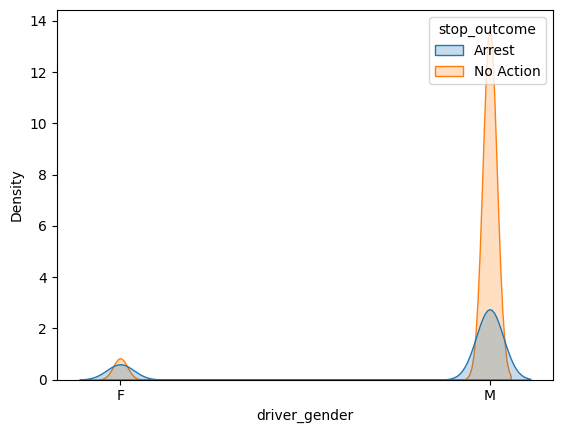

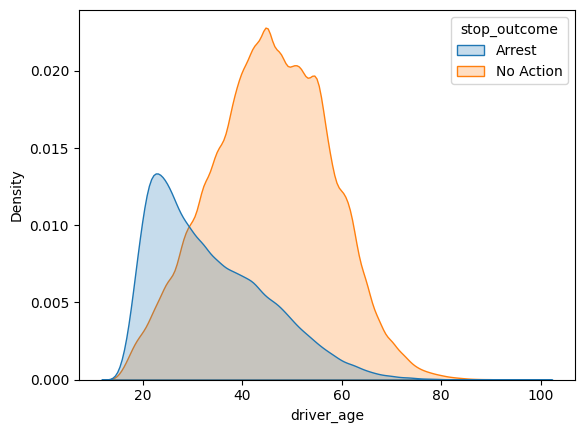

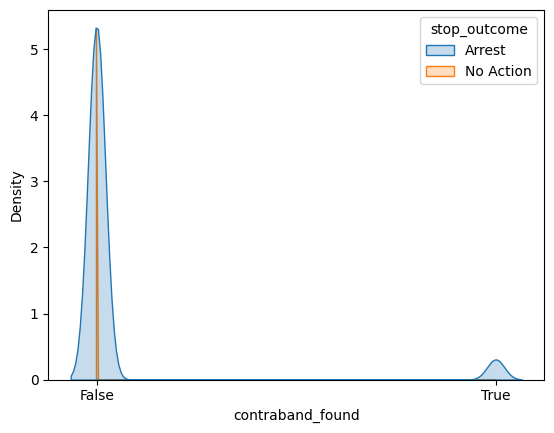

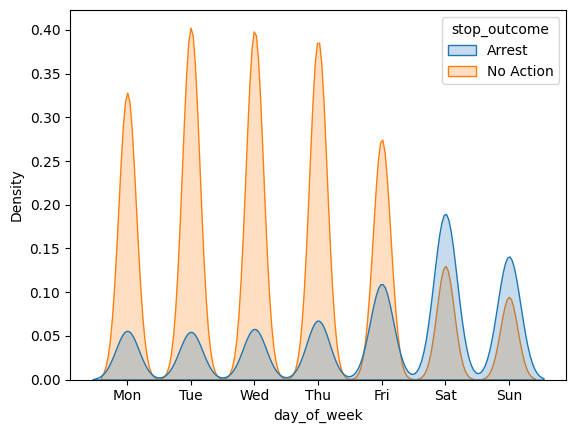

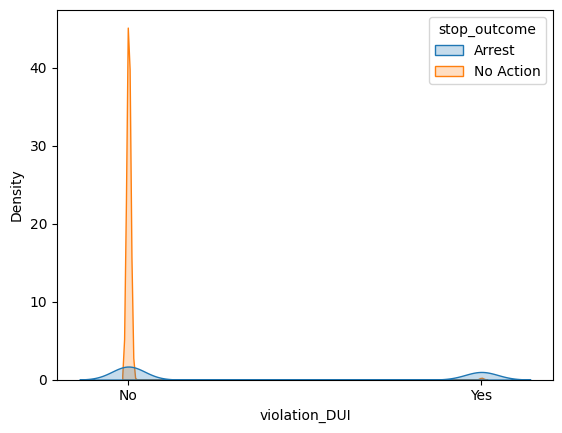

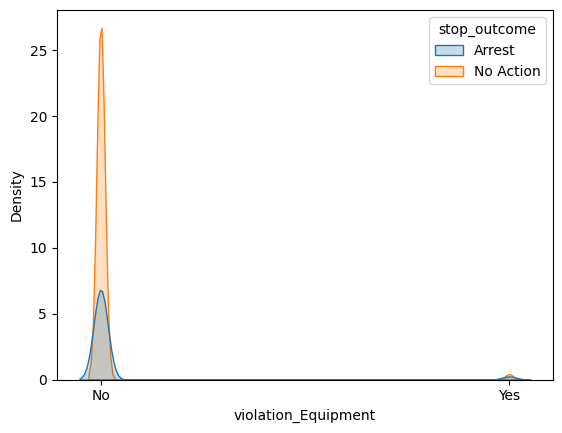

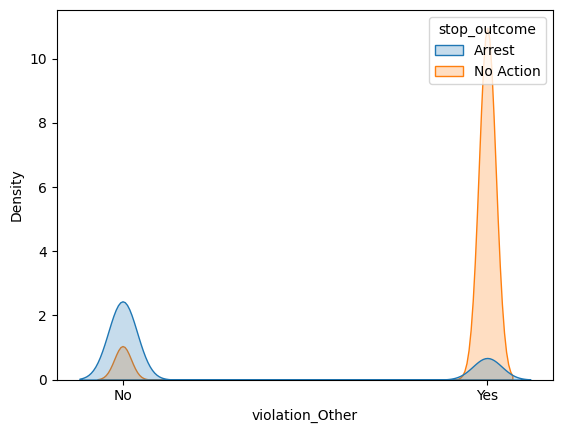

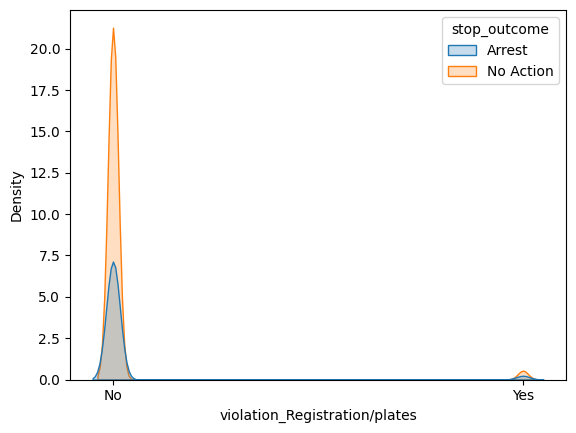

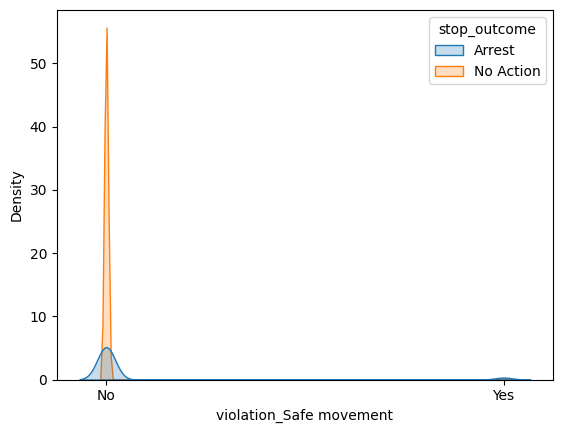

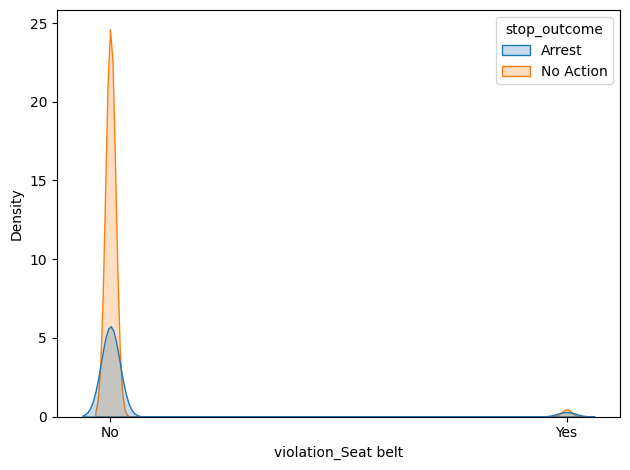

In [40]:
# Master Encoding Dictionary
encoding_dict = { 'driver_gender': gender_enc, 'contraband_found': contraband_enc, 'day_of_week': days_enc,
    'violation_DUI': vio_DUI_enc, 'violation_Equipment': vio_Equipment_enc, 'violation_Other': vio_Other_enc,
    'violation_Registration/plates': vio_Registration_enc, 'violation_Safe movement': vio_SafeMove_enc,
    'violation_Seat belt': vio_Seatbelt_enc,'violation_Speeding': vio_Speeding_enc,'violation_Stopsign': vio_Stopsign_enc,
    'driver_race_Asian': driver_race_Asian_enc,'driver_race_Black': driver_race_Black_enc, 'driver_race_Hispanic': driver_race_Hispanic_enc,
    'driver_race_Other': driver_race_Other_enc,'driver_race_White': driver_race_White_enc,'search_type_Consent': search_type_Consent_enc,
    'search_type_Incident to Arrest': search_type_Incident_to_Arrest_enc,'search_type_No Search Conducted': search_type_NoSearchConducted_enc,
    'search_type_Probable Cause': search_type_ProbableCause_enc,'search_type_Protective Frisk': search_type_ProtectiveFrisk_enc,
    'search_type_Warrant': search_type_Warrant_enc,
}

# Plot kde
for i, (column, color) in enumerate(zip(X.columns, sns.color_palette())):
    plt.figure(i)
    sns.kdeplot(x=column, fill=True, hue=y, data=X, color=color)
    
    if column in encoding_dict:
        plt.xticks(list(encoding_dict[column].keys()), list(encoding_dict[column].values()))
        
plt.tight_layout()
plt.show()


In [41]:
# Normalise the values in training, validation, and the value of test X
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [42]:
# Training k-NN model
knn = KNeighborsClassifier(n_neighbors=30)  # using 30 as the n_neighbors based on your previous analysis
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [43]:
# Predict outcomes using k-NN classifier

X_temp = X_test.values.copy()
y_pred_knn = knn.predict(X_temp)
# 이걸로 돌리면 error : AttributeError: 'Flags' object has no attribute 'c_contiguous'
#y_pred_knn = knn.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
# Add predictions to a dataframe
df_viz = X_test.copy()
df_viz['Predicted'] = y_pred_knn
df_viz['True'] = y_test.values

In [45]:
# # Predicted results using KDE
# for column, color in zip(X.columns, sns.color_palette()):
#     plt.figure(figsize=(10,6))
#     sns.kdeplot(data=df_viz[df_viz['Predicted'] == 0], x=column, label='Not Arrested', shade=True, color=color)
#     sns.kdeplot(data=df_viz[df_viz['Predicted'] == 1], x=column, label='Arrested', shade=True, color='red')
#     plt.legend()
#     plt.title(f'Distribution of {column} by Predicted Arrest')
#     plt.show()

In [46]:
# Convert the 'Predicted' and 'True' columns to binary (0 and 1)
df_viz['Predicted'] = df_viz['Predicted'].map({'No Action': 0, 'Arrest': 1})
df_viz['True'] = df_viz['True'].map({'No Action': 0, 'Arrest': 1})


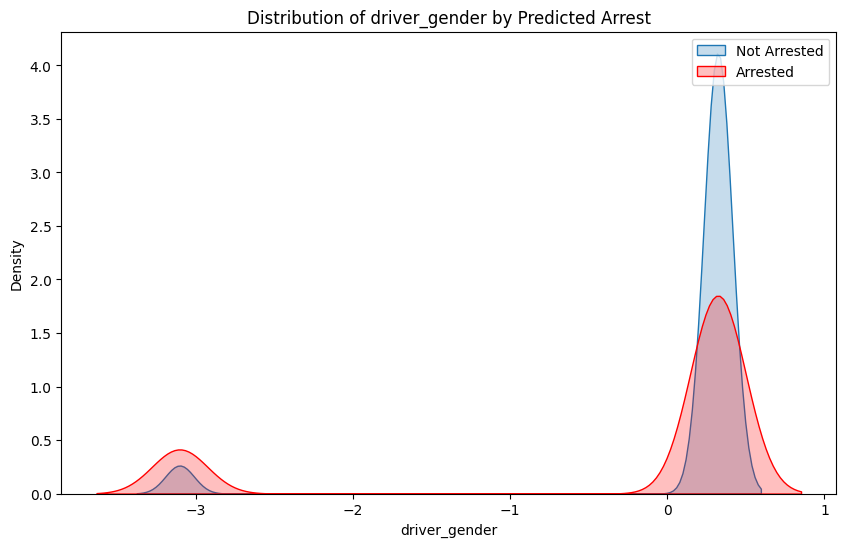

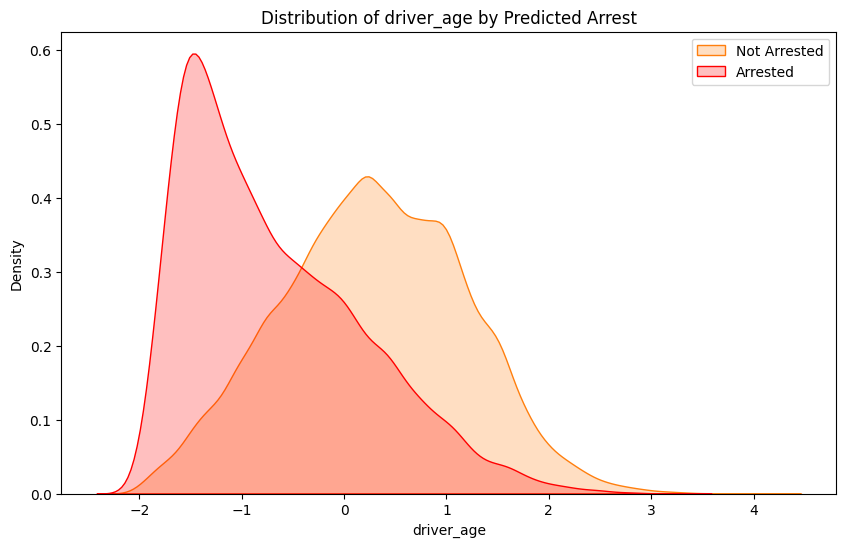

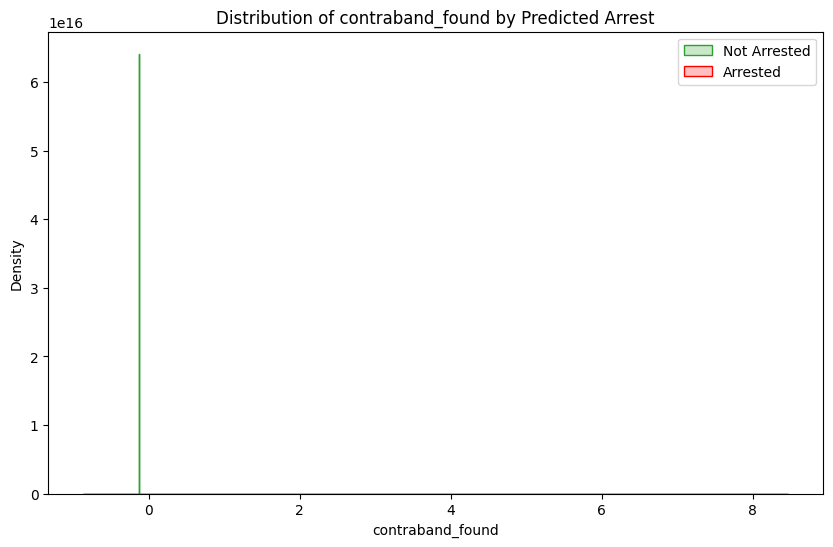

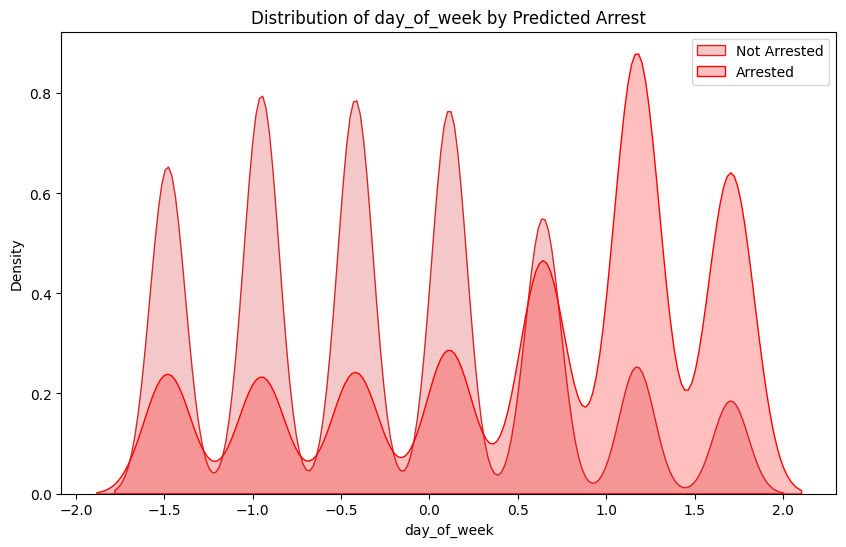

/var/folders/ks/13d0sd4x4pbb14qxtb4k32pm0000gn/T/ipykernel_10863/2414806863.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_viz[df_viz['Predicted'] == 0], x=column, label='Not Arrested', fill=True, color=color)


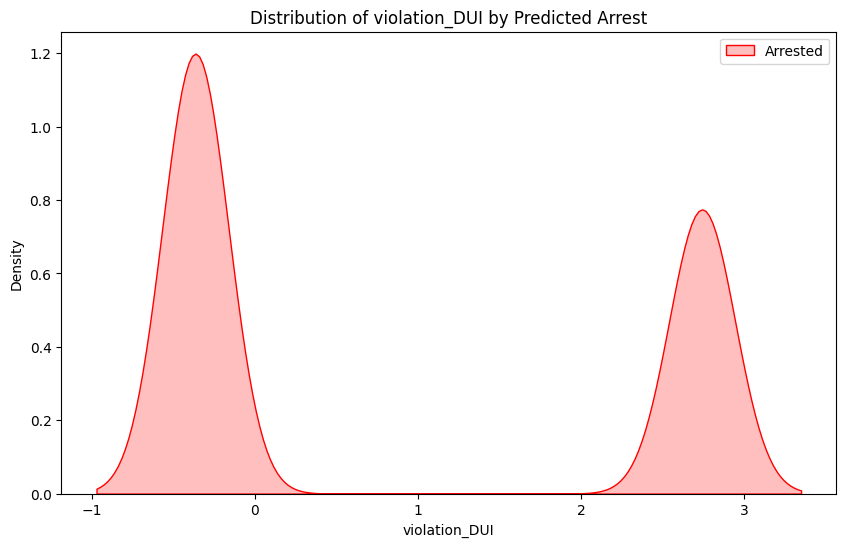

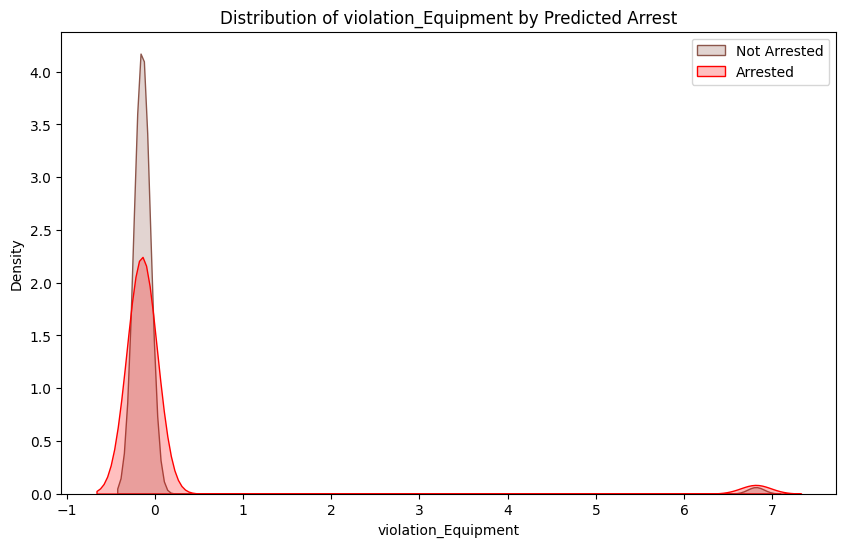

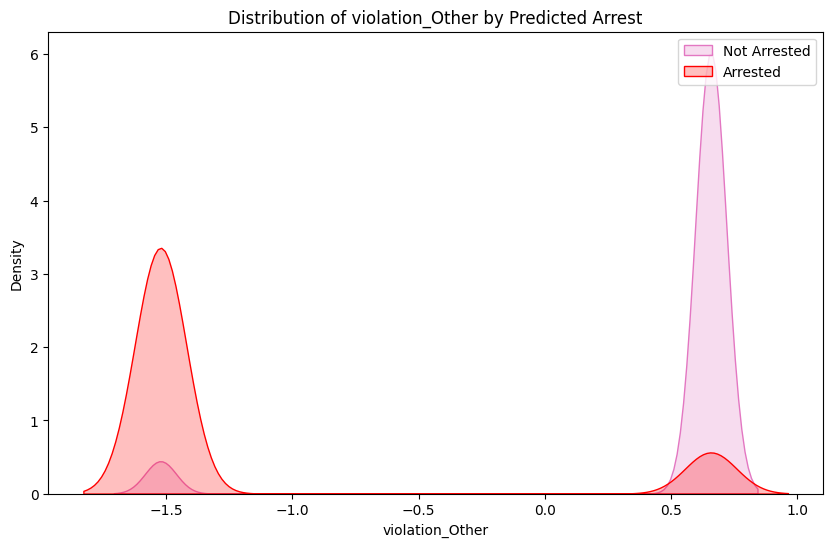

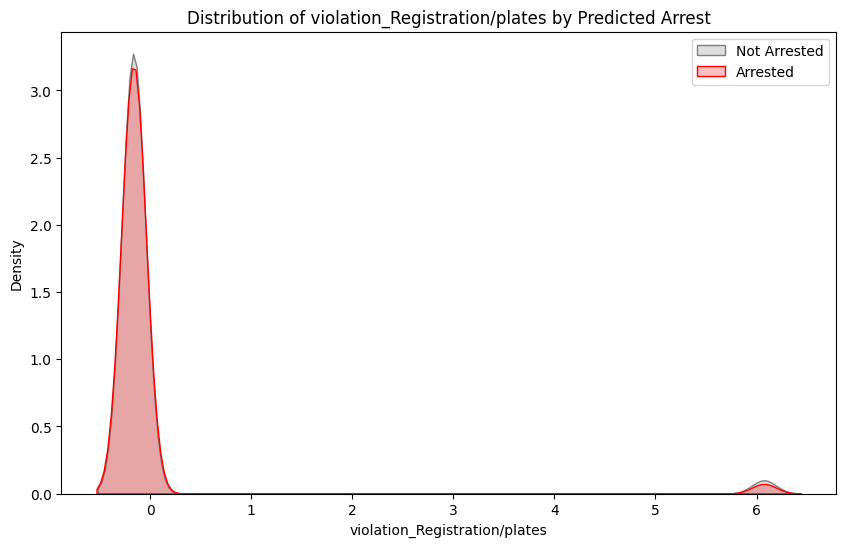

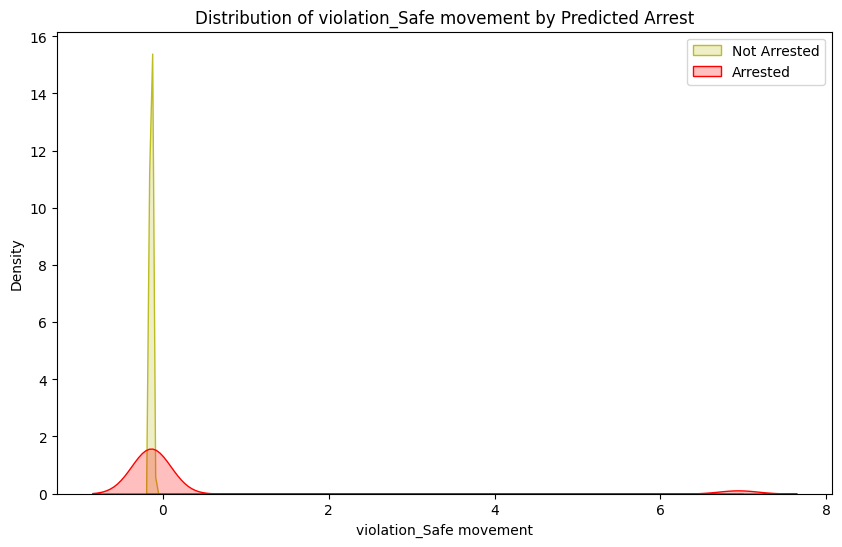

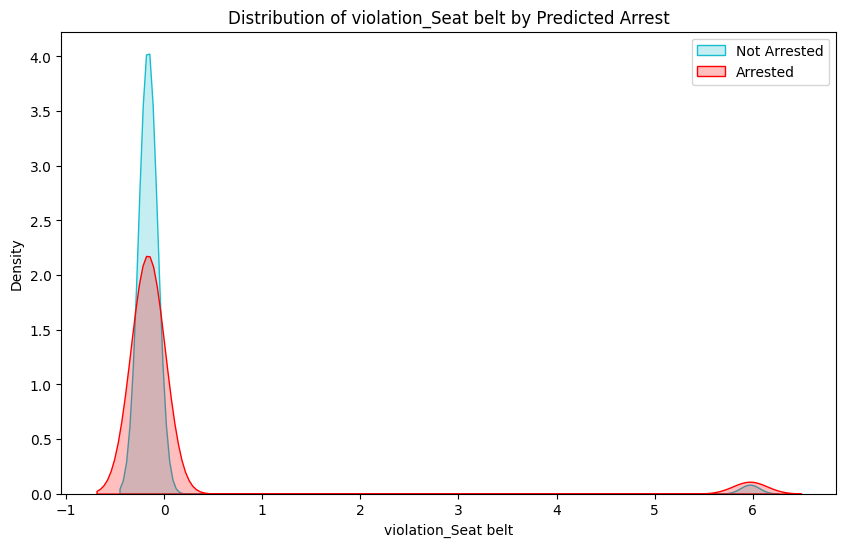

In [47]:
# Predicted results using KDE
for column, color in zip(X.columns, sns.color_palette()):
    plt.figure(figsize=(10,6))
    
    # Replace 'shade' with 'fill'
    sns.kdeplot(data=df_viz[df_viz['Predicted'] == 0], x=column, label='Not Arrested', fill=True, color=color)
    sns.kdeplot(data=df_viz[df_viz['Predicted'] == 1], x=column, label='Arrested', fill=True, color='red')
    
    plt.legend()
    plt.title(f'Distribution of {column} by Predicted Arrest')
    plt.show()


In [48]:
from sklearn.metrics import accuracy_score

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_valid_np = X_valid.to_numpy()
y_valid_np = y_valid.to_numpy()

In [49]:
# 이부분 돌리는데 최소 10~20분 걸림!!

from sklearn.metrics import accuracy_score
 
k_values = range(1, 80) # Range of k value
accuracy_scores = []

# Looping k value
for k in k_values:
    # Instant k-NN with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit kNN
    knn.fit(X_train_np, y_train_np)
    # Predict on the validation
    y_pred = knn.predict(X_valid_np)
    # Calculate accuracy score
    accuracy_scores.append(accuracy_score(y_valid_np, y_pred))

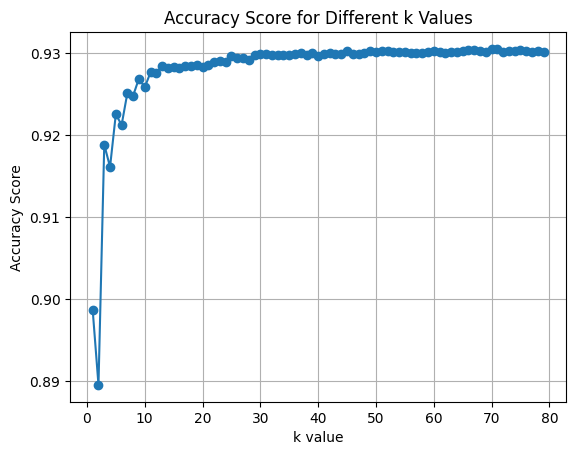

In [50]:
# Plot the results
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different k Values')
plt.grid(True)
plt.show()

In [51]:
#accuracy_scores
best_accuracy = max(accuracy_scores)
best_k = accuracy_scores.index(best_accuracy) + 1
print(f"The best k value is: {best_k} with accuracy: {best_accuracy}")

The best k value is: 71 with accuracy: 0.9305279194130084


In [52]:
# X_train, y_train save as numpy arrays 
X_train_contiguous = np.ascontiguousarray(X_train)
y_train_contiguous = np.ascontiguousarray(y_train)
X_valid_contiguous = np.ascontiguousarray(X_valid)
y_valid_contiguous = np.ascontiguousarray(y_valid)


# k=22 kNN
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train_contiguous, y_train_contiguous)

# predict
y_pred = knn.predict(X_valid_contiguous)

In [53]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_valid_contiguous, y_pred)
labels = ['No Arrested', 'Arrested']

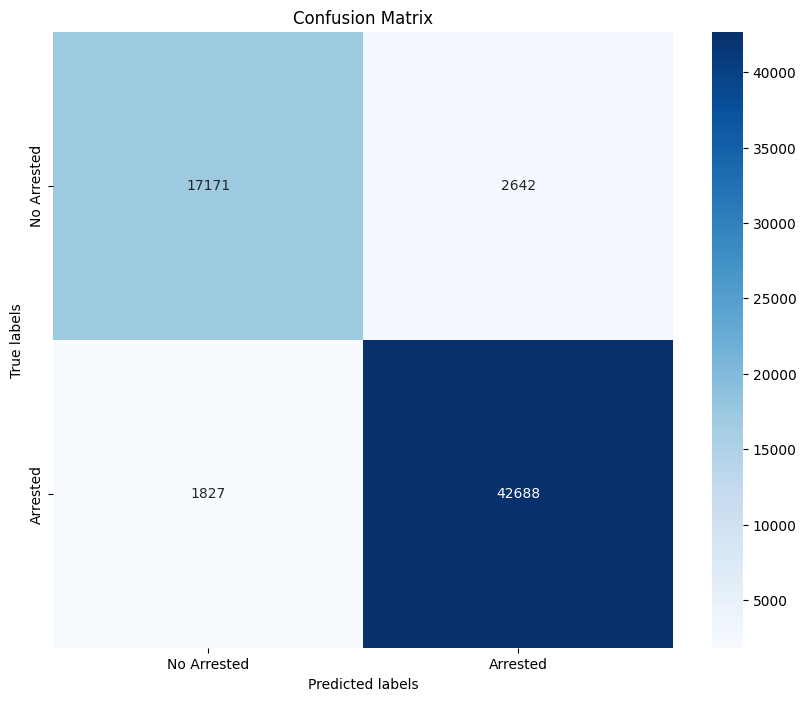

In [54]:
# Evaluating the model
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Confusion matrix cm:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

In [56]:
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")


# 0 is arrested.
# 1 is no action

True Positives (TP): 42688
True Negatives (TN): 17171
False Positives (FP): 2642
False Negatives (FN): 1827
Accuracy: 0.9305
Recall: 0.9590
Precision: 0.9417
F1-Score: 0.9503


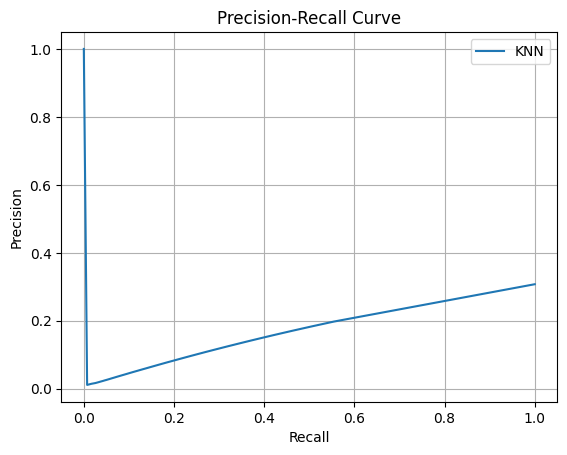

In [57]:
from sklearn.metrics import precision_recall_curve

# Convert class labels to binary format
# Assuming 'Arrest' is the positive class, set it to 1 and 'No Action' to 0
y_true_binary = np.where(y_test == 'Arrest', 1, 0)

# Get prediction probabilities
X_test_contiguous = np.ascontiguousarray(X_test)
y_scores = knn.predict_proba(X_test_contiguous)[:, 1]  # positive class probabilities

# Calculate precision/recall
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_scores, pos_label=1)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

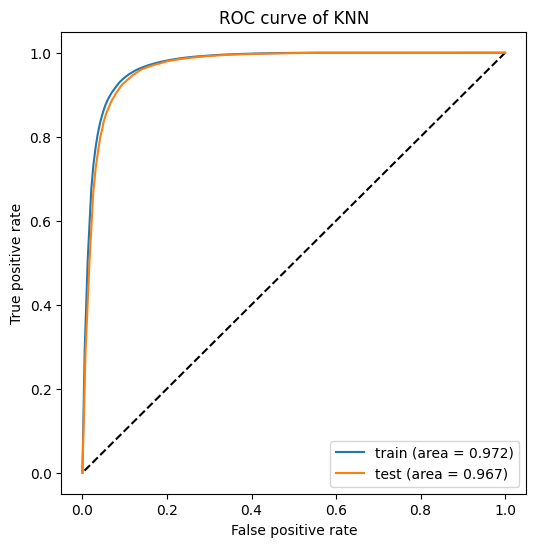

In [58]:
from sklearn.metrics import roc_curve, auc

# Convert class labels to binary format
# Assuming 'Arrest' is the positive class, set it to 1 and 'No Action' to 0
y_train_binary = np.where(y_train == 'Arrest', 0, 1)
y_test_binary = np.where(y_test == 'Arrest', 0, 1)

# Get prediction probabilities
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)
y_scores_train = knn.predict_proba(X_train_contiguous)[:, 1]
y_scores_test = knn.predict_proba(X_test_contiguous)[:, 1]

# Compute ROC curve
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train_binary, y_scores_train)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test_binary, y_scores_test)

# Calculate the AUC
auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
plt.plot([1, 0], [1, 0], 'k--')
plt.plot(fpr_train_knn, tpr_train_knn, label='train (area = {:.3f})'.format(auc_train_knn))
plt.plot(fpr_test_knn, tpr_test_knn, label='test (area = {:.3f})'.format(auc_test_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.show()